# Image classification using LeNet-5


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


## Data Loader

In [4]:
classes = ('dry', 'wet') 
path_train = '/content/drive/MyDrive/tmp/macular_degeneration/train/'
path_valid = '/content/drive/MyDrive/tmp/macular_degeneration/valid/'
batch_size = 5

In [5]:
trainset = torchvision.datasets.ImageFolder(root = path_train,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((128,128)),
                                                                                          transforms.ToTensor()]))
validset = torchvision.datasets.ImageFolder(root = path_valid,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((128,128)),
                                                                                          transforms.ToTensor()]))
train_iter = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
valid_iter = torch.utils.data.DataLoader(validset,batch_size=batch_size,shuffle=True)

In [6]:
tgtnames = trainset.classes
tgtnames

['dry', 'wet']

torch.Size([5])
torch.Size([5, 1, 128, 128])


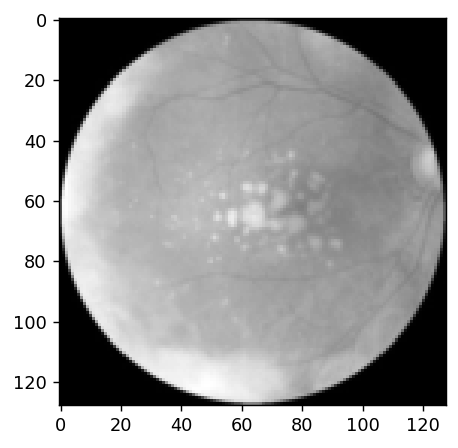

tensor(0)
dry


In [7]:
dataiter=iter(train_iter)
images, labels = dataiter.next()
print(labels.shape)
print(images.shape)
I = images[0][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(labels[0])
print(tgtnames[labels[0]])

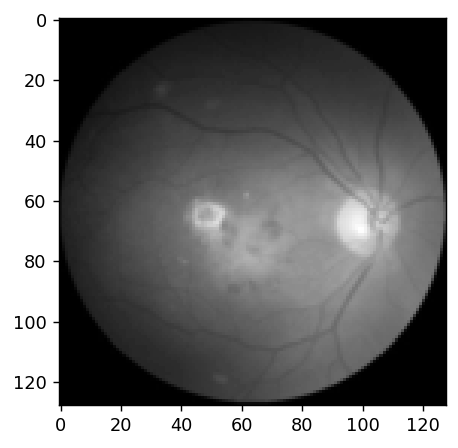

wet


In [8]:
n=3
I = images[n][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(tgtnames[labels[n]])

# Model (LeNet-5)

In [9]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)
    
net = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1),           
    nn.ReLU(),                                                                    
    nn.AvgPool2d(kernel_size=2, stride=2),                                        
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=1),          
    nn.ReLU(),                                                                    
    nn.AvgPool2d(kernel_size=2, stride=2),                                        
    Flatten(),  
    nn.Linear(in_features=16*32*32, out_features=1600),                            
    nn.ReLU(),
    nn.Linear(1600, 160),
    nn.ReLU(),
    nn.Linear(160, 2)
)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=16384, out_features=1600, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1600, out_features=160, bias=True)
  (10): ReLU()
  (11): Linear(in_features=160, out_features=2, bias=True)
)

In [10]:
torch.nn.init.xavier_uniform_(net[0].weight)
torch.nn.init.xavier_uniform_(net[3].weight)
torch.nn.init.xavier_uniform_(net[7].weight)
torch.nn.init.xavier_uniform_(net[9].weight)
torch.nn.init.xavier_uniform_(net[11].weight)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=16384, out_features=1600, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1600, out_features=160, bias=True)
  (10): ReLU()
  (11): Linear(in_features=160, out_features=2, bias=True)
)

## PyTorch Hub

- PyTorch에서는 resnet, densenet 등 유명한 network를 쉽게 불러와서 활용할 수 있습니다.
- Input은 color image를 기준으로 네트워크 모델이 구현이 되어 있으므로, 1채널 input(흑백영상)을 활용할 때에는 model에 대한 수정이 필요합니다. 여기에서는 input을 넣을 때에 1채널을 동일하게 반복하여 넣는 방식을 사용하였습니다.
- Output의 개수는 class의 개수에 맞게 수정해 주어야 합니다.
- 활용할 수 있는 model을 아래를 참고합니다.
- https://pytorch.org/hub/research-models

In [11]:
#net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
#print(net)

In [12]:
#net.fc = nn.Linear(512,2,bias=True)
#net.to(device)
#print(net)

# Model Training

In [13]:
# setting hyper-parameters
learning_rate = 0.03
num_epochs = 100

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

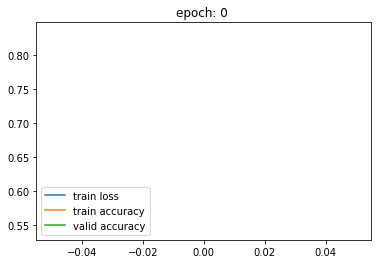

train loss:  0.5425946426391601
train accuracy:  0.8211382031440735
valid accuracy:  0.8333333134651184


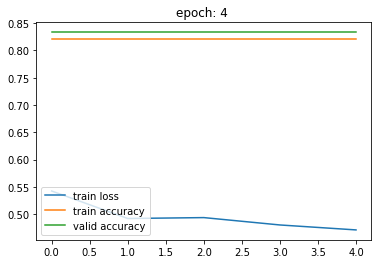

train loss:  0.47133312225341795
train accuracy:  0.8211382031440735
valid accuracy:  0.8333333134651184


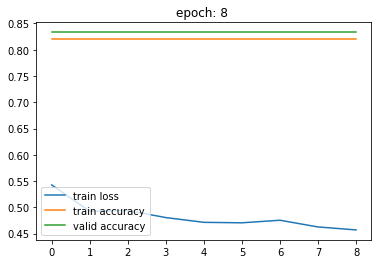

train loss:  0.45689990997314456
train accuracy:  0.8211382031440735
valid accuracy:  0.8333333134651184


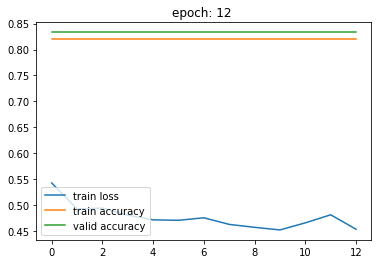

train loss:  0.4532088851928711
train accuracy:  0.8211382031440735
valid accuracy:  0.8333333134651184


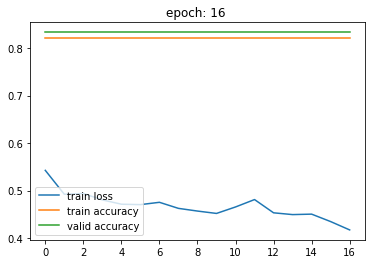

train loss:  0.4172051239013672
train accuracy:  0.8211382031440735
valid accuracy:  0.8333333134651184


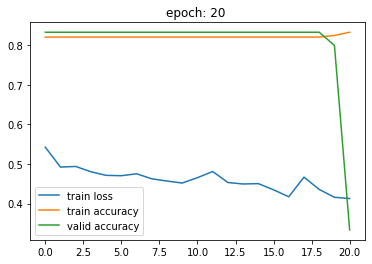

train loss:  0.41262481689453123
train accuracy:  0.8333333134651184
valid accuracy:  0.3333333432674408


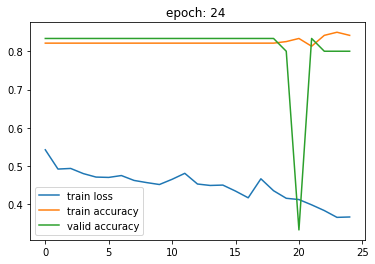

train loss:  0.3670996856689453
train accuracy:  0.8414633870124817
valid accuracy:  0.800000011920929


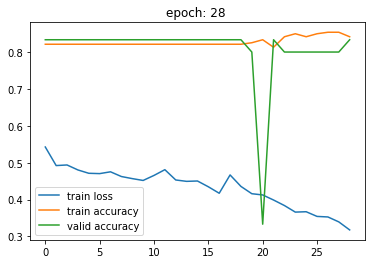

train loss:  0.31781652450561526
train accuracy:  0.8414633870124817
valid accuracy:  0.8333333134651184


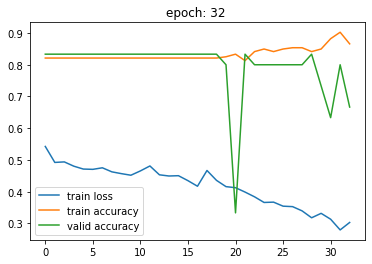

train loss:  0.3030721664428711
train accuracy:  0.8658536672592163
valid accuracy:  0.6666666865348816


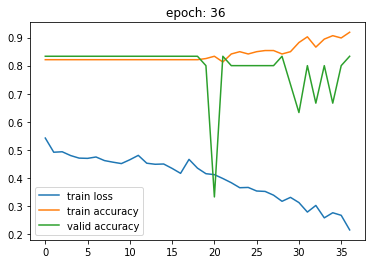

train loss:  0.21612848281860353
train accuracy:  0.9186992049217224
valid accuracy:  0.8333333134651184


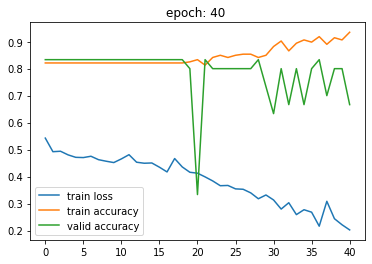

train loss:  0.2022946548461914
train accuracy:  0.934959352016449
valid accuracy:  0.6666666865348816


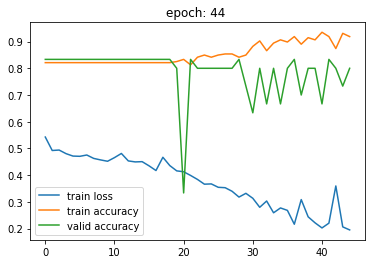

train loss:  0.194853515625
train accuracy:  0.9186992049217224
valid accuracy:  0.800000011920929


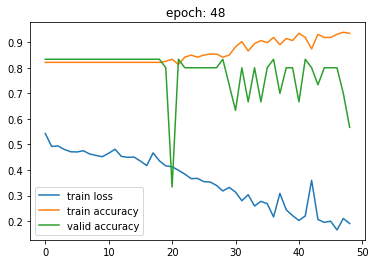

train loss:  0.19026227951049804
train accuracy:  0.934959352016449
valid accuracy:  0.5666666626930237


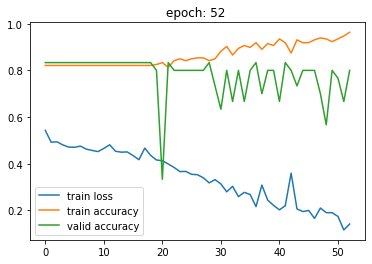

train loss:  0.14151793479919433
train accuracy:  0.9634146094322205
valid accuracy:  0.800000011920929


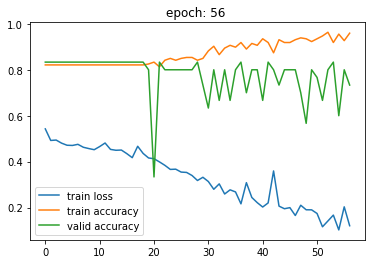

train loss:  0.12084918975830078
train accuracy:  0.9593495726585388
valid accuracy:  0.7333333492279053


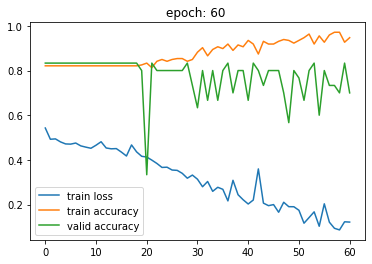

train loss:  0.12128684997558593
train accuracy:  0.9471544623374939
valid accuracy:  0.699999988079071


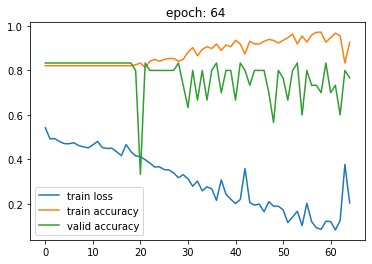

train loss:  0.20456953048706056
train accuracy:  0.9268292784690857
valid accuracy:  0.7666666507720947


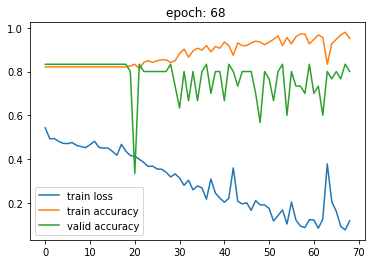

train loss:  0.11705451011657715
train accuracy:  0.9512194991111755
valid accuracy:  0.800000011920929


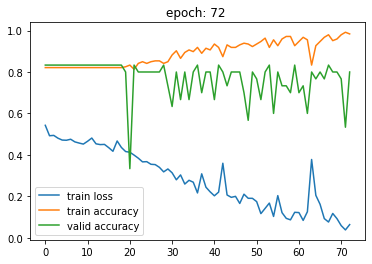

train loss:  0.06323687553405762
train accuracy:  0.9837398529052734
valid accuracy:  0.800000011920929


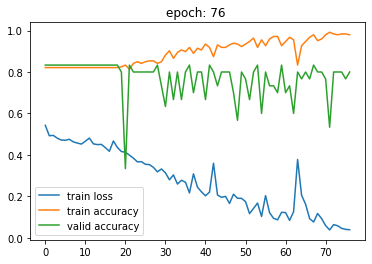

train loss:  0.03837146997451782
train accuracy:  0.9796748161315918
valid accuracy:  0.800000011920929


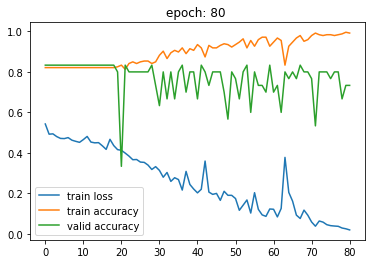

train loss:  0.019204399585723876
train accuracy:  0.9918699264526367
valid accuracy:  0.7333333492279053


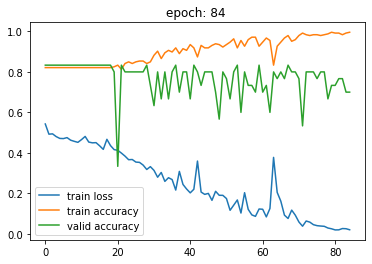

train loss:  0.0200006365776062
train accuracy:  0.9959349632263184
valid accuracy:  0.699999988079071


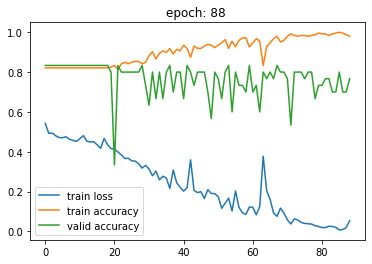

train loss:  0.054154734611511234
train accuracy:  0.9796748161315918
valid accuracy:  0.7666666507720947


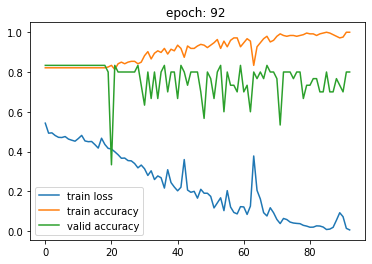

train loss:  0.005600042343139648
train accuracy:  1.0
valid accuracy:  0.800000011920929


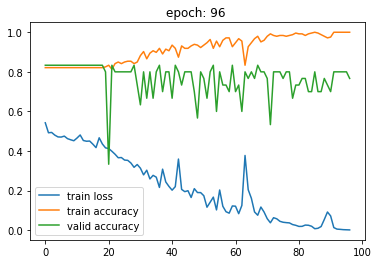

train loss:  0.001539267748594284
train accuracy:  1.0
valid accuracy:  0.7666666507720947


In [14]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    X,y = X.to(device),y.to(device)
    y_hat=net(X)
    #y_hat = net(X.repeat(1,3,1,1)) # pytorch hub model
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()

  loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
  accs_train = np.append(accs_train,correct.cpu()/len(trainset))

  correct = 0
  for X,y in valid_iter:
    X,y = X.to(device),y.to(device)
    y_hat = net(X)
    #y_hat = net(X.repeat(1,3,1,1))  # pytorch hub model
    correct += (y_hat.argmax(dim=1)==y).sum()

  #print((y_hat[:4]))
  accs_valid = np.append(accs_valid,correct.cpu()/len(validset))


  if epoch%4 == 0:
    plt.plot(loss_train,label='train loss')
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.pause(.0001)
    plt.show()

    print('train loss: ',loss_train[-1])
    print('train accuracy: ',accs_train[-1])
    print('valid accuracy: ',accs_valid[-1])

## valdiation set results 

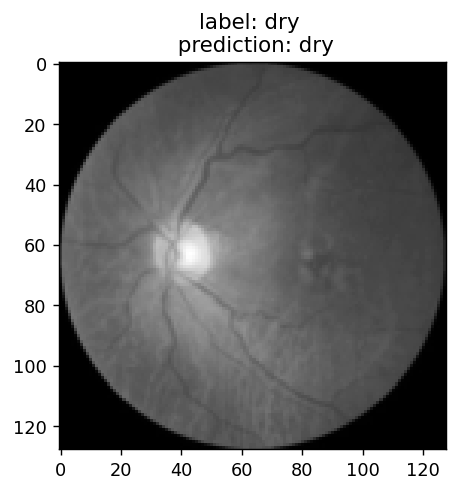

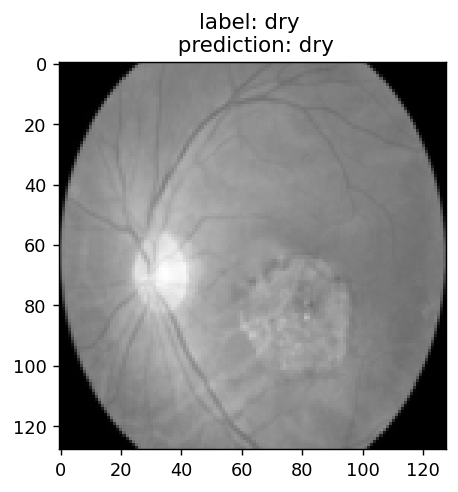

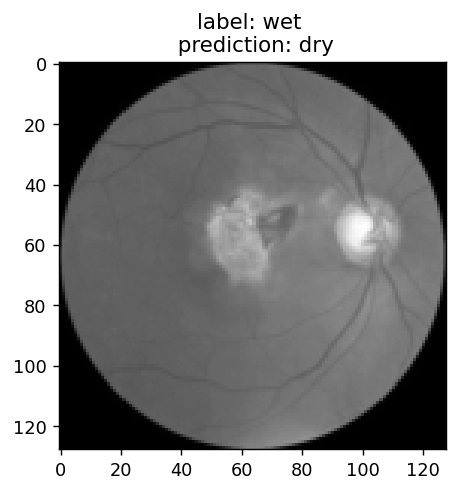

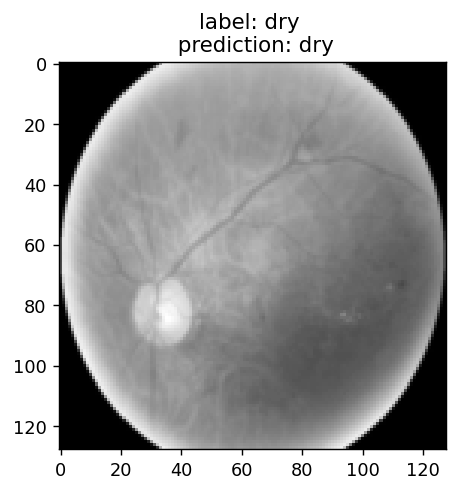

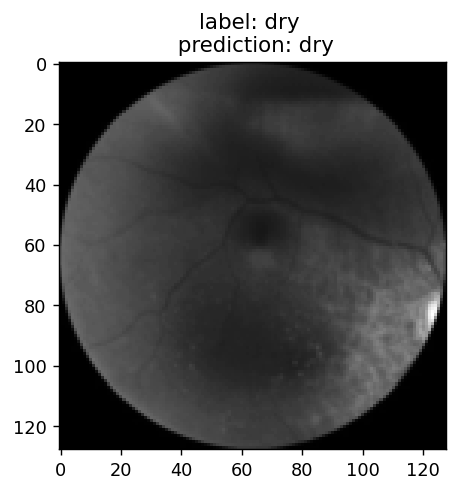

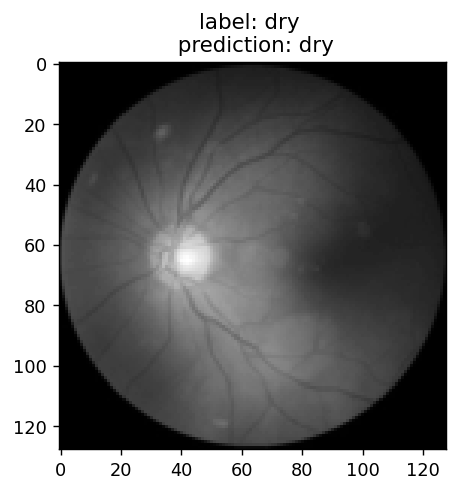

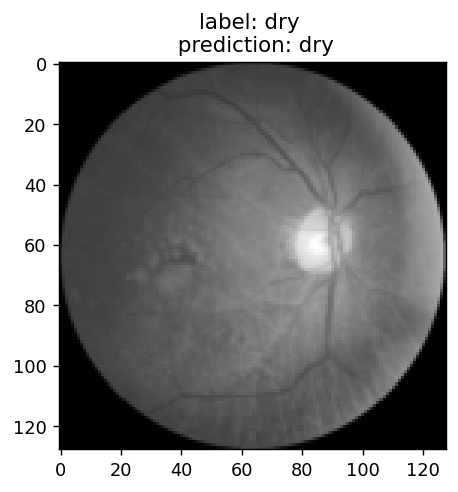

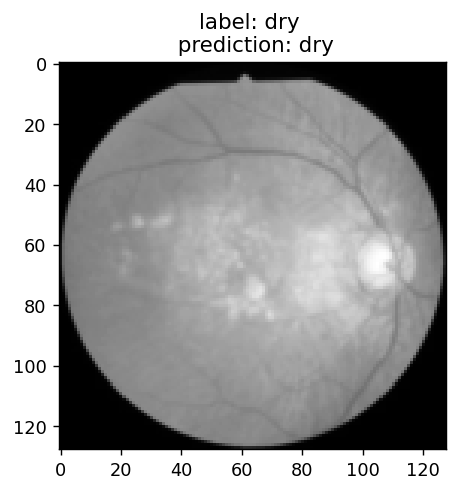

In [15]:
i = 0
for X,y in valid_iter:
  i=i+1
  X=X.to(device)
  y_hat = net(X)    
#  y_hat = net(X.repeat(1,3,1,1))  # pytorch hub model
  y_hat = y_hat.argmax(dim=1)
  for n in range(4):
    plt.figure(dpi=128)
    plt.imshow(X[n].cpu().squeeze(),cmap='gray')
    plt.title('label: %s \n prediction: %s'%(tgtnames[y[n]],tgtnames[y_hat[n]]))
    plt.pause(.0001)
  if i>1:
     break